In [ ]:
# Importing libraries for the model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Path to the training datasets
train_dog_path = '/content/drive/MyDrive/train/dogs'  # Use Google Drive path or Colab file path
train_cat_path = '/content/drive/MyDrive/train/cats'

# Function to resize images in a folder
def resize_images_in_folder(folder_path):
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = Image.open(file_path)
        img = img.resize((112, 112))
        img.save(file_path)

# Resize images in training dog and cat folders
resize_images_in_folder(train_dog_path)
resize_images_in_folder(train_cat_path)


In [ ]:
# Path to the testing datasets
test_dog_path = '/content/drive/MyDrive/train/dogs'  # Use Google Drive path or Colab file path
test_cat_path = '/content/drive/MyDrive/train/cats'

# Resize images in testing dog and cat folders
resize_images_in_folder(test_dog_path)
resize_images_in_folder(test_cat_path)


In [ ]:
!mkdir train
!mkdir test


In [ ]:
# Setting up ImageDataGenerators for training and testing datasets
IMAGE_SIZE = 112
BATCH_SIZE = 32
train_data_size = 180
test_data_size = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load images into generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',  # Path to training folder
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',  # Path to testing folder
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 315 images belonging to 2 classes.
Found 315 images belonging to 2 classes.


In [ ]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPool2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Summarize the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 110, 110, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 53, 53, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │       2,163,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,173,545 (8.29 MB)

 Trainable params: 2,173,545 (8.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with Adam optimizer and binary crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8666 - loss: 1.1267 - val_accuracy: 0.9048 - val_loss: 0.4201
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 855ms/step - accuracy: 0.9211 - loss: 0.3560 - val_accuracy: 0.9048 - val_loss: 0.3436
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 928ms/step - accuracy: 0.9161 - loss: 0.2894 - val_accuracy: 0.9048 - val_loss: 0.3457
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8971 - loss: 0.3462 - val_accuracy: 0.9048 - val_loss: 0.3249
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 810ms/step - accuracy: 0.8875 - loss: 0.3713 - val_accuracy: 0.9048 - val_loss: 0.3091
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 984ms/step - accuracy: 0.9392 - loss: 0.2437 - val_accuracy: 0.9048 - val_loss: 0.3113
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 984ms/step - accuracy: 0.9275 - loss: 0.2830 - val_accuracy: 0.9048 - val_loss: 0.3027
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 908ms/step - accuracy: 0.9024 - loss: 0.2995 - val_accuracy: 0.9048 - va

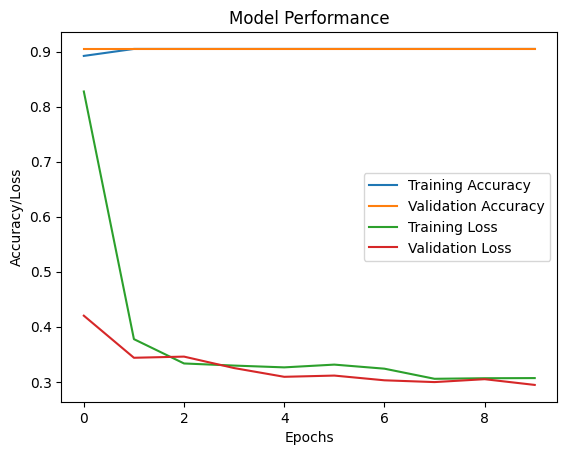

In [ ]:
# Plotting training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
